In [10]:
import numpy as np
import matplotlib.pyplot as plt
from comphy import root_find
from comphy import diff_eq
from comphy import dv
import scienceplots
plt.style.use('science')

In [2]:
rf = root_find
f = lambda x: x-1
rf.bisection( 0, 6, f, 1e-4,1000)

n          a          b          c       f(c)
 0   0.000000   6.000000   3.000000   2.000000
 1   0.000000   3.000000   1.500000   0.500000
 2   0.000000   1.500000   0.750000  -0.250000
 3   0.750000   1.500000   1.125000   0.125000
 4   0.750000   1.125000   0.937500  -0.062500
 5   0.937500   1.125000   1.031250   0.031250
 6   0.937500   1.031250   0.984375  -0.015625
 7   0.984375   1.031250   1.007812   0.007812
 8   0.984375   1.007812   0.996094  -0.003906
 9   0.996094   1.007812   1.001953   0.001953
10   0.996094   1.001953   0.999023  -0.000977
11   0.999023   1.001953   1.000488   0.000488
12   0.999023   1.000488   0.999756  -0.000244
13   0.999756   1.000488   1.000122   0.000122
14   0.999756   1.000122   0.999939  -0.000061
The root is  0.99993896484375


0.99993896484375

In [3]:

def f2(x,y):
    f = np.array([y[1],-4*np.pi**2*y[0]])
    return f

In [4]:
de = diff_eq
h = 0.01
t0 = 0.0
t1 = 15


N = int(1+ (t1-t0)/h)

xs = np.arange(t0, t1+h/2, h)  # Generate range of x values

y_ini = np.asarray([1.0, 0.0])  # Initial condition

# Call the methods
ysE =   de.caller(de.euler, t0,t1,N, y_ini, f=f2)
ysm =   de.caller(de.midpoint, t0,t1,N,y_ini, f=f2)
ysrk4 = de.caller(de.rk4, t0,t1,N,y_ini,f=f2)

In [5]:

y_ex = np.cos(2*np.pi*xs)
p_ex = -2*np.pi*np.sin(2*np.pi*xs)

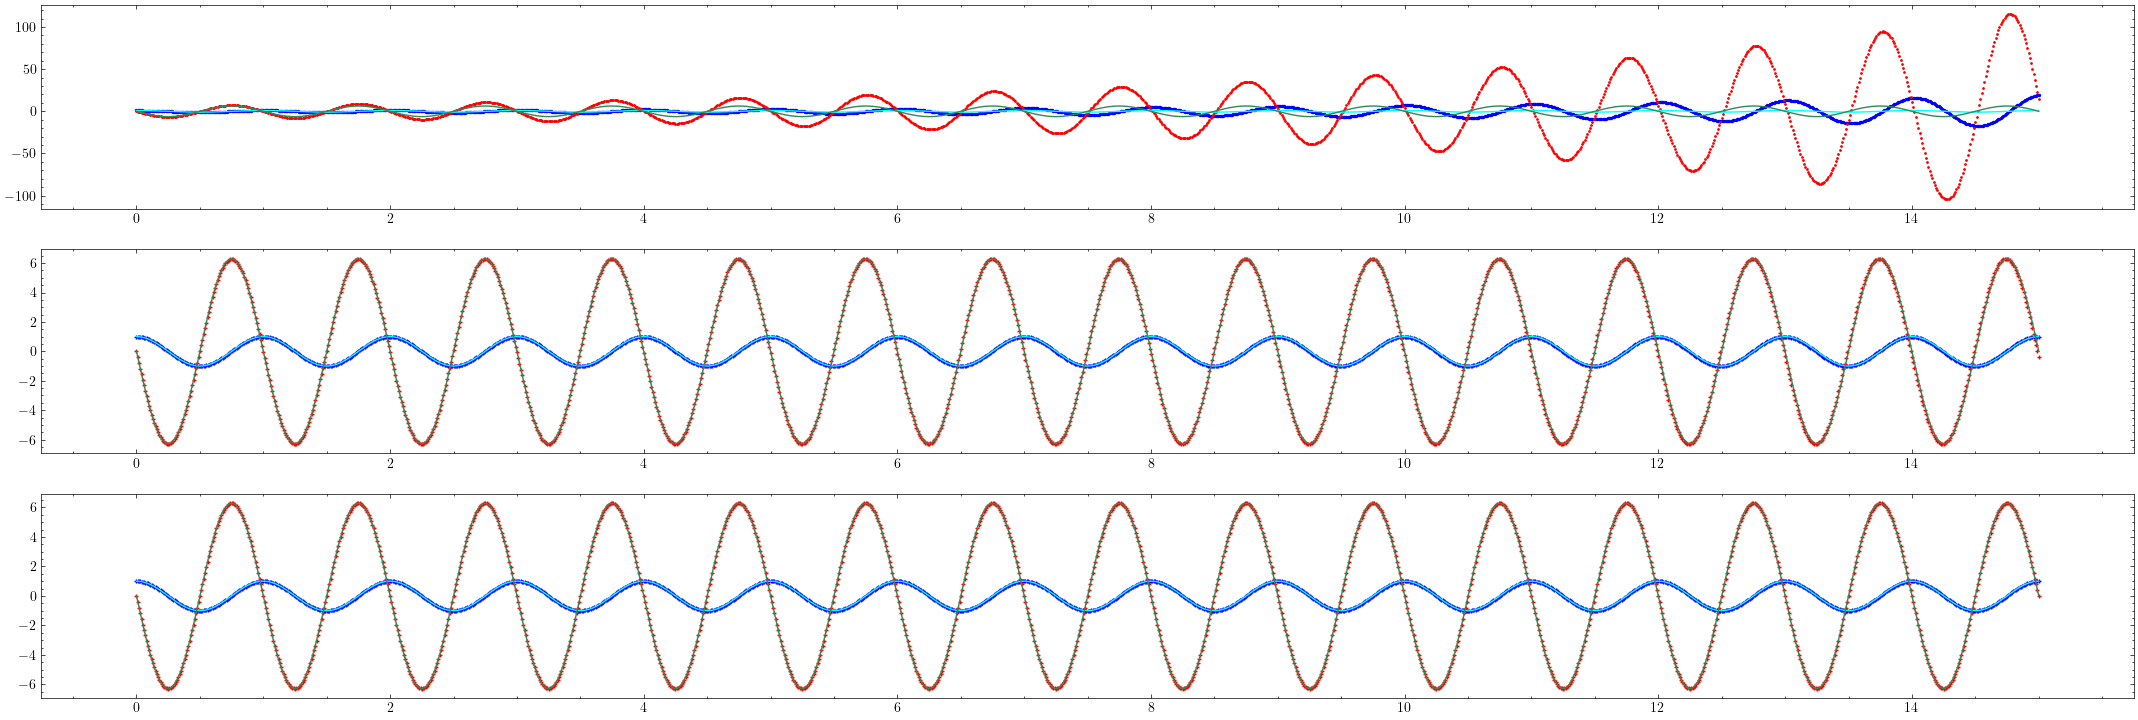

In [6]:

fig3,axes3 = plt.subplots(3,1,figsize=(9*3,9), dpi=100)
axes3[0].scatter(xs, ysE[:,0], color ="blue",label = "Euler Method for y ", s=2)
axes3[0].scatter(xs, ysE[:,1], color ="red",label = "Euler Method for p ", s=1)
axes3[0].plot(xs,y_ex, color = "cyan", label = "Exact Solution for y ")
axes3[0].plot(xs,p_ex, color = "seagreen", label = "Exact Solution for p ")

axes3[1].scatter(xs, ysm[:,0], color= "blue", label = "Midpoint Method for y ", marker= "+",s=5)
axes3[1].scatter(xs, ysm[:,1], color= "red", label = "Midpoint Method for p ", marker= "+",s=10)
axes3[1].plot(xs,y_ex, color = "cyan", label = "Exact Solution for y ")
axes3[1].plot(xs,p_ex, color = "seagreen", label = "Exact Solution for p ")

axes3[2].scatter(xs, ysrk4[:,0], color= "blue", label = "Runge Kutta Method for y ", marker= "+",s=5)
axes3[2].scatter(xs, ysrk4[:,1], color= "red", label = "Runge Kutta Method for p ", marker= "+",s=10)
axes3[2].plot(xs,y_ex, color = "cyan", label = "Exact Solution")
axes3[2].plot(xs,p_ex, color = "seagreen", label = "Exact Solution")

In [7]:

h = 0.01
a = 0.0
b = 15

y0 = np.array([1.0])
xval = np.arange(t0, t1+h/2, h)  # Generate range of x values
y_ini = np.asarray([1.0, 0.0])  # Initial condition
v0 = np.array([0.0])

def f3(x,y):
    return -4*(np.pi**2)*y

In [ ]:

y_vlt = de.caller(de.vlt,a,b,N,y0, f3,v0)
y_rk4 = de.caller(de.rk4,a,b,N,y_ini, f=f2)
[y_vvlt, p_vvlt] = de.caller(de.vel_vlt,a,b,N,y0,f3, v0)
y_ex = np.cos(2*np.pi*xval)


[0.]
[0.]
The following methods are available for calculating the derivative of a function: {'forward difference': 'fd', 'backward difference': 'bd', 'central difference': 'cd', 'five point difference': 'fivept'}


In [31]:
def ff(i):
    return y_vlt[i]

p_vlt =dv.fd(np.asarray(range(len(y_vlt)-1), dtype='int'),1,ff)/h

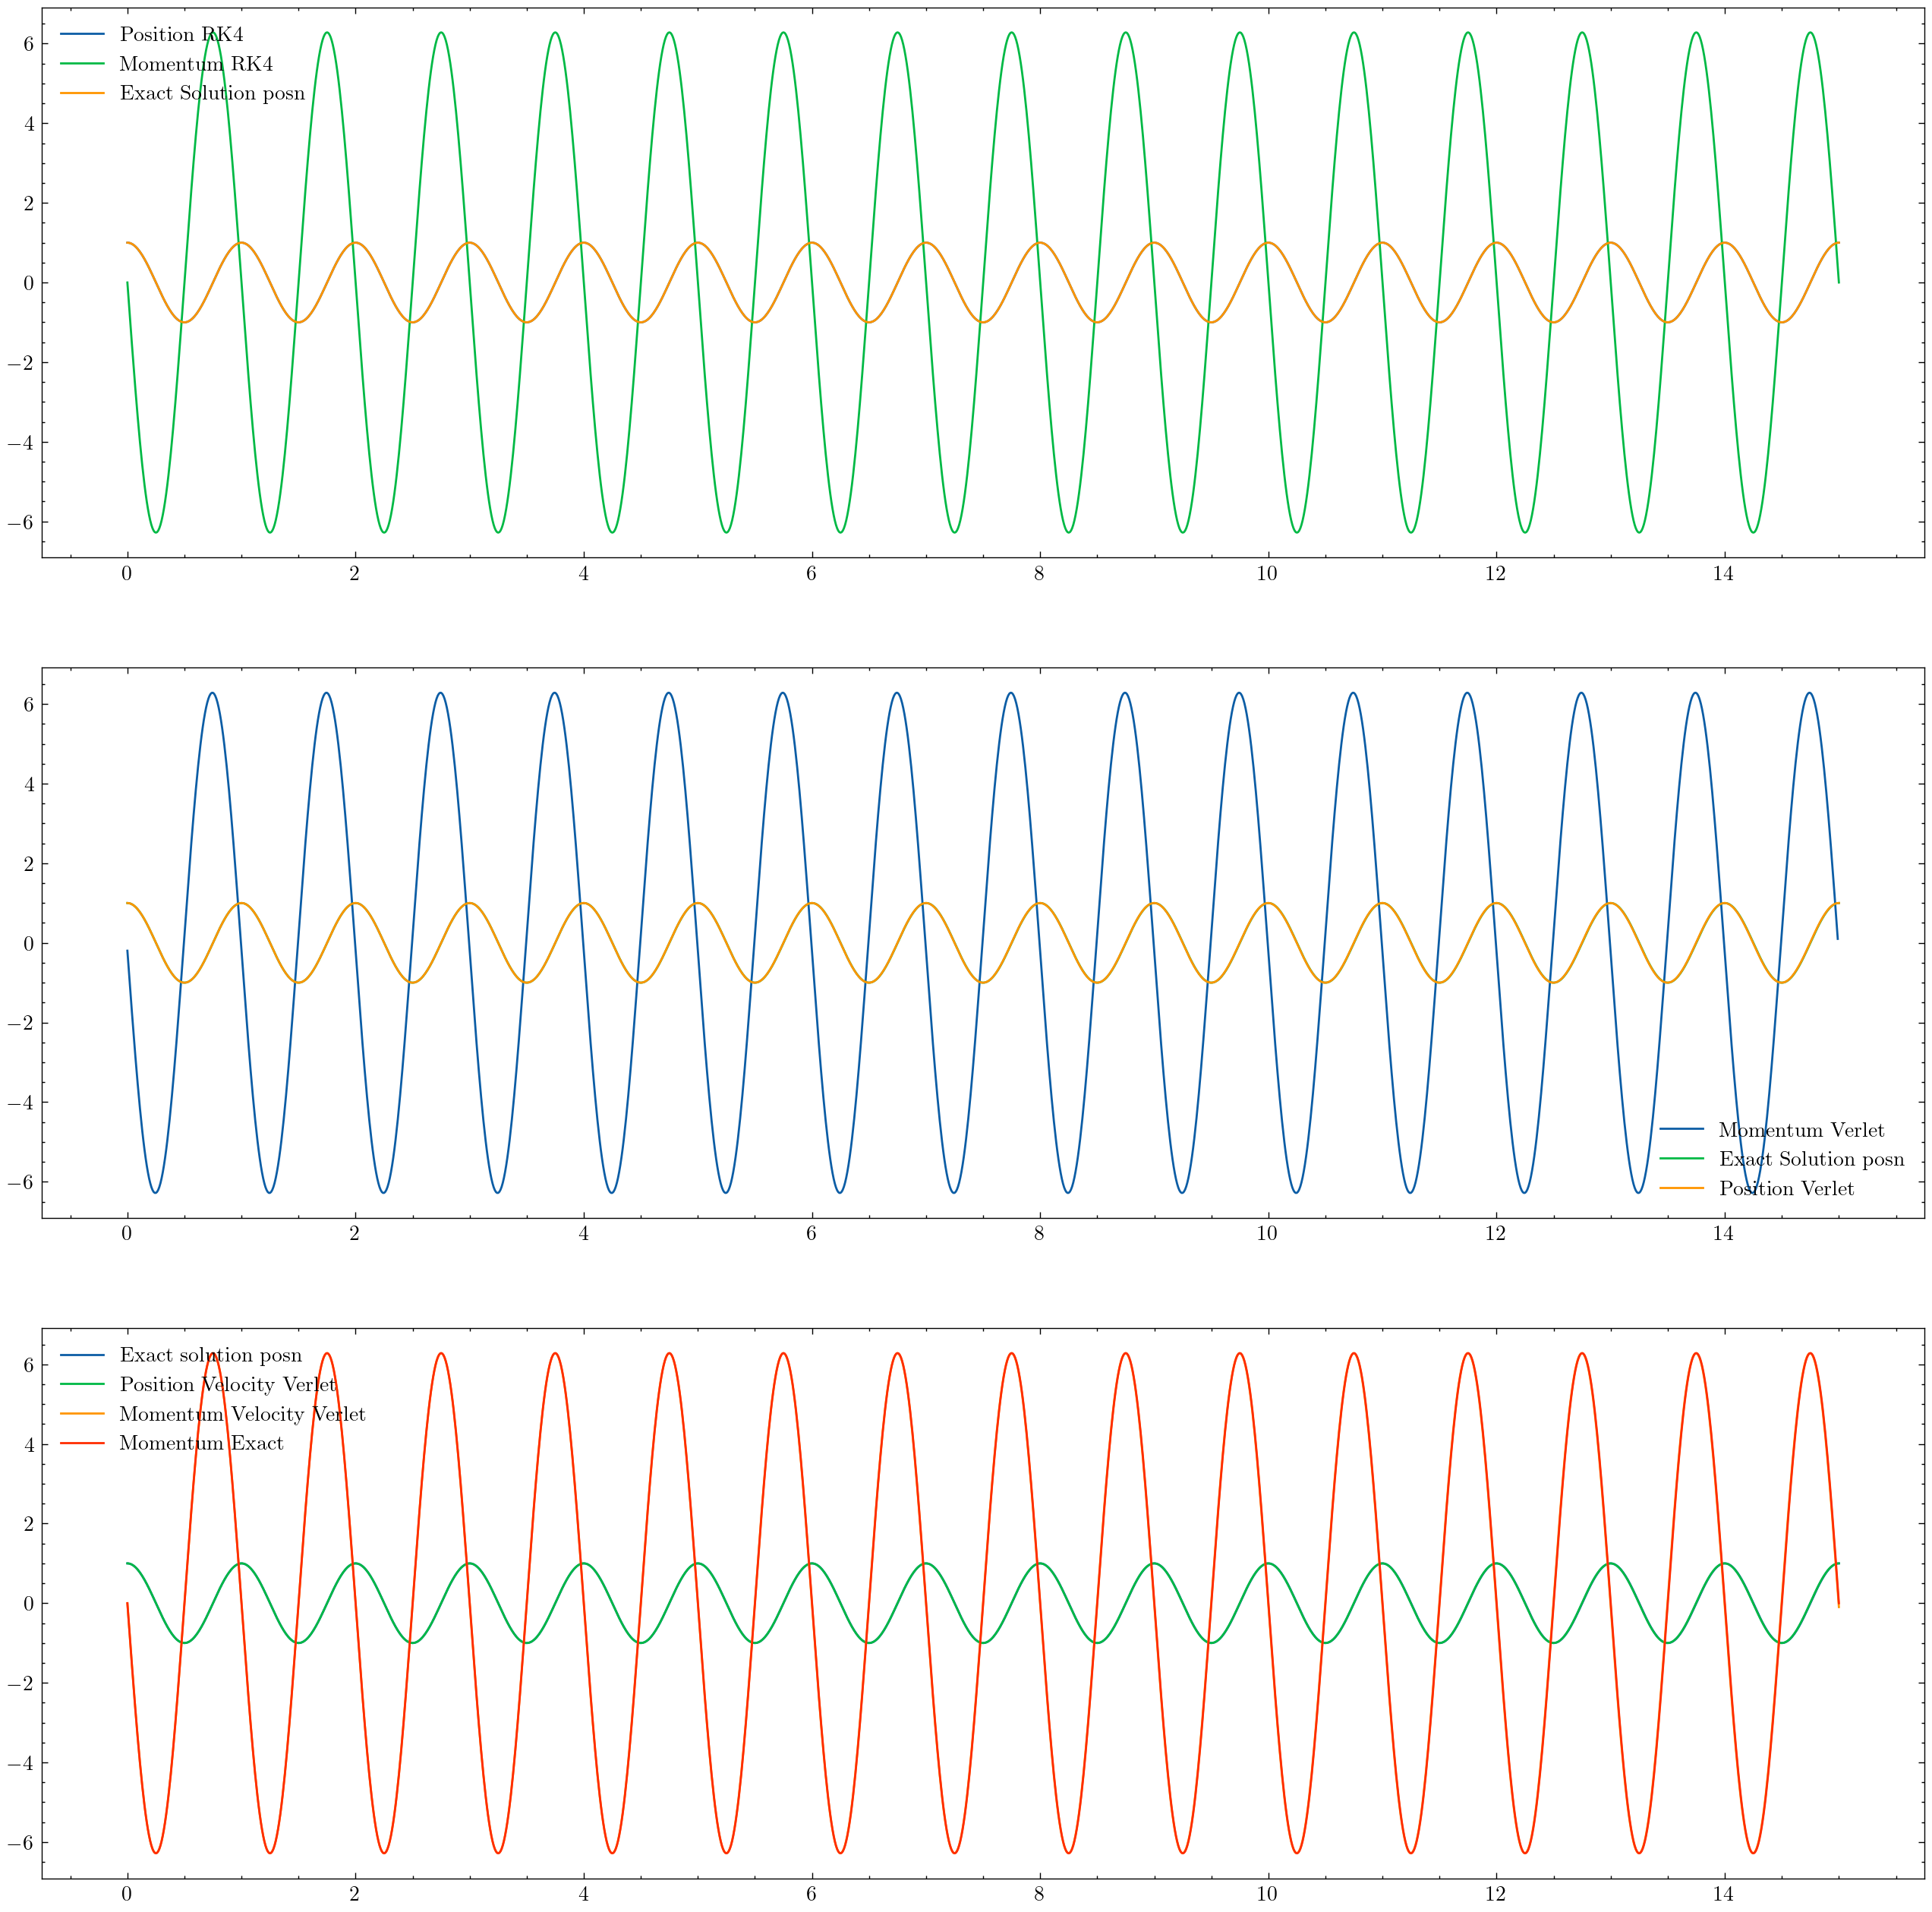

In [32]:

fig,axes = plt.subplots(3,1, figsize=(16,16), dpi =200)
axes[0].plot(xval, y_rk4[:,0], label = "Position RK4")
axes[0].plot(xval, y_rk4[:,1], label = "Momentum RK4")
axes[1].plot(xval[:-1], p_vlt, label = "Momentum Verlet")

axes[0].plot(xval, y_ex, label = " Exact Solution posn")
axes[1].plot(xval, y_ex, label = "Exact Solution posn")
axes[2].plot(xval, y_ex, label = "Exact solution posn")
axes[1].plot(xval, y_vlt, label = "Position Verlet")
axes[2].plot(xval, y_vvlt, label = "Position Velocity Verlet")
axes[2].plot(xval, p_vvlt, label = "Momentum Velocity Verlet")
axes[2].plot(xval, p_ex, label = "Momentum Exact")

for ax in fig.get_axes():
    ax.legend()

In [33]:
10//3

3

In [34]:
de.caller?

Signature: de.caller(meth, a, b, N, y0, f, *args, **kwargs)
Docstring:
Parameters
----------
meth : function
    the numerical method to be used
    euler for Euler method
    midpoint for Midpoint method
    rk4 for Runge-Kutta 4 method
    vlt for Verlet method
    vel_vlt for Velocity-Verlet method
    leapfrg for Leapfrog method
a : float
    start time for differential equation solver
b : float
    end time for differential equation solver
N : int
    number of strips for discretization
y0 : float
    initial value of differential equation solution
f : function
    the function on the right hand side of the differential equation

Returns
---------
returns the value of y at each time step using the numerical method specified.
    
File:      ~/Projects/PH3205/10.0.1.68/comphy/diff_eq.py
Type:      function